# DUAL GP
May 2024

*   Dual GP developed by [Yongtao Liu](https://scholar.google.com/citations?user=V9FMPgQAAAAJ&hl=en) in [AtomAi](https://atomai.readthedocs.io/en/latest/)

*    Analysis performed by  [Sheryl L. Sanchez](https://scholar.google.com/citations?hl=en&user=zFRKT-MAAAAJ) and [Jonghee Yang](https://scholar.google.com/citations?user=jLyJOXMAAAAJ&hl=en&oi=ao)


*   Data by [Jonghee Yang](https://scholar.google.com/citations?user=jLyJOXMAAAAJ&hl=en&oi=ao)
,[Mahshid Ahmadi](https://scholar.google.com/citations?hl=en&user=DNOfTQ0AAAAJ&view_op=list_works&sortby=pubdate)
* Material Synthesis for Iterations performed by [Sheryl L. Sanchez](https://scholar.google.com/citations?hl=en&user=zFRKT-MAAAAJ)




#Time Evolution Analysis for Luminescence Datasets



In [ ]:
#@title Import Modules

import os
import glob
import numpy as np
import pandas as pd

#Machine Learning Tools
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Peak Finding
from scipy.stats import norm, multivariate_normal
import scipy.signal as ss

#Plotting Tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

#Ternary Installation
!pip install -q python-ternary
import ternary

#gdown Installation
!pip install gdown==3.6.0

# from numpyro import distributions

from scipy.signal import find_peaks


!pip install atomai


  Preparing metadata (setup.py) ... done
  Created wheel for gdown: filename=gdown-3.6.0-py3-none-any.whl size=5224 sha256=ef9b0416de3af1958622f15bbb9f467bf190f07159d8dab53174ad0408e74340
  Stored in directory: /root/.cache/pip/wheels/a7/00/af/7528f0f7a7cd3f085b4b79d81e49744946b654fb19dd979363
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.6/175.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 

In [ ]:
import time
import re

In [ ]:
import shutil
from datetime import datetime  # Import the datetime class from the datetime module
import zipfile

In [ ]:
!pip install GPax


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.2/330.2 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 24.4 MB/s eta 0:00:00


In [ ]:

import gpax
import jax.random as jra
import jax.numpy as jnp
gpax.utils.enable_x64()
import seaborn as sns
import atomai as aoi
from sklearn.metrics import mean_squared_error



## User Input


In [ ]:
#@title Experimental Data

#Names of Precursors
precursor1 = '$CsPbI_3$' #@param {type:"string"}
precursor2 = '$PEA_2PbI_4$' #@param {type:"string"}
precursor3 = '$BDAPbI_4$' #@param {type:"string"}

#Wells that we should ignore
wells_to_ignore = '' #@param {type:"string"}
#1, 2, 3, 4
#C2,D2,E2,F2,G2,H2,A3,B3,C3,D3,E3,F3,G3,H3,A4,B4,C4,D4,E4,F4,G4,H4,A5,B5,C5,D5,E5,F5,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6,A7,B7,C7,D7,E7,F7,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8,A9,B9,C9,D9,E9,F9,G9,H9,A10,B10,C10,D10,E10,F10,G10,H10,A11,B11,C11,D11,E11,F11,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
#5
#A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,H2,A3,B3,C3,D3,E3,F3,G3,H3,A4,B4,C4,D4,E4,F4,G4,H4,A5,B5,C5,D5,E5,F5,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6,A7,B7,C7,D7,E7,F7,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8,A9,B9,C9,D9,E9,F9,G9,H9,A10,B10,C10,D10,E10,F10,G10,H10,A11,B11,C11,D11,E11,F11,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
#6
#A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,C2,D2,E2,F2,G2,F3,G3,H3,A4,B4,C4,D4,E4,F4,G4,H4,A5,B5,C5,D5,E5,F5,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6,A7,B7,C7,D7,E7,F7,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8,A9,B9,C9,D9,E9,F9,G9,H9,A10,B10,C10,D10,E10,F10,G10,H10,A11,B11,C11,D11,E11,F11,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
#7
#A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,C2,D2,E2,F2,G2,H2,A3,B3,C3,D3,E3,E4,F4,G4,H4,A5,B5,C5,D5,E5,F5,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6,A7,B7,C7,D7,E7,F7,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8,A9,B9,C9,D9,E9,F9,G9,H9,A10,B10,C10,D10,E10,F10,G10,H10,A11,B11,C11,D11,E11,F11,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
#8
#A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,C2,D2,E2,F2,G2,H2,A3,B3,C3,D3,E3,F3,G3,H3,A4,B4,C4,D4,E5,F5,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6,A7,B7,C7,D7,E7,F7,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8,A9,B9,C9,D9,E9,F9,G9,H9,A10,B10,C10,D10,E10,F10,G10,H10,A11,B11,C11,D11,E11,F11,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
#9
#A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,C2,D2,E2,F2,G2,H2,A3,B3,C3,D3,E3,F3,G3,H3,A4,B4,C4,D4,E4,F4,G4,H4,A5,B5,C5,D5,F6,G6,H6,A7,B7,C7,D7,E7,F7,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8,A9,B9,C9,D9,E9,F9,G9,H9,A10,B10,C10,D10,E10,F10,G10,H10,A11,B11,C11,D11,E11,F11,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
#10
#A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,C2,D2,E2,F2,G2,H2,A3,B3,C3,D3,E3,F3,G3,H3,A4,B4,C4,D4,E4,F4,G4,H4,A5,B5,C5,D5,E5,F5,G5,H5,A6,B6,C6,D6,E6,H7,A8,B8,C8,D8,E8,F8,G8,H8,A9,B9,C9,D9,E9,F9,G9,H9,A10,B10,C10,D10,E10,F10,G10,H10,A11,B11,C11,D11,E11,F11,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
#11
#A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,C2,D2,E2,F2,G2,H2,A3,B3,C3,D3,E3,F3,G3,H3,A4,B4,C4,D4,E4,F4,G4,H4,A5,B5,C5,D5,E5,F5,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6,A7,B7,C7,D7,E7,F7,G7,C9,D9,E9,F9,G9,H9,A10,B10,C10,D10,E10,F10,G10,H10,A11,B11,C11,D11,E11,F11,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
#12
#A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,C2,D2,E2,F2,G2,H2,A3,B3,C3,D3,E3,F3,G3,H3,A4,B4,C4,D4,E4,F4,G4,H4,A5,B5,C5,D5,E5,F5,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6,A7,B7,C7,D7,E7,F7,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8,A9,B9,G10,H10,A11,B11,C11,D11,E11,F11,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
#13
#A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,C2,D2,E2,F2,G2,H2,A3,B3,C3,D3,E3,F3,G3,H3,A4,B4,C4,D4,E4,F4,G4,H4,A5,B5,C5,D5,E5,F5,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6,A7,B7,C7,D7,E7,F7,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8,A9,B9,C9,D9,E9,F9,G9,H9,A10,B10,C10,D10,E10,F10,D12,E12,F12,G12,H12
#D12,E12,F12,G12,H12
#Information about Measurement Range
start_wavelength = 450 #@param {type:"integer"}
end_wavelength = 850 #@param {type:"integer"}
wavelength_step_size = 1 #@param {type:"integer"}

time_step =  15#@param {type:"integer"}

#Information about the reads
number_of_reads = 42 #@param {type:"integer"}
luminescence_read_numbers = '1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41' #@param {type:"string"}
#1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41
#2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42
#Convert the string into a list to use later
if len(wells_to_ignore) != 0:
  wells_to_ignore = list(wells_to_ignore.split(","))
luminescence_read_numbers = list(luminescence_read_numbers.split(","))

interpolate = True #@param {type:"boolean"}


In [ ]:
#@title Data Information

#Location of the files and place to output data
#folder_name = 'Cytation' #@param {type:'string'}

#Name of files
data_file_name = '12-07-2023-04_Cs-PEA-BDA_ternary_films_long-term.csv' #@param {type:'string'}
composition_file_name = '11.13.2023 - CsPbI3, DPAPbI4 and BDAPbI4 - Compositions.csv' #@param {type:'string'}


#Download the correct data
data_file = '1Lb7uiUMgZ4fLyuUQP6f6AUtFmXIXvA2d' #@param {type:"string"}
composition_file = '1zEZ8LzEnlNhVBgO0iG0yY7WMRI9Z-WMx' #@param {type:"string"}

## Loading and Formatting Data

In [ ]:
#@title Download Files

!gdown https://drive.google.com/uc?id={data_file}
!gdown https://drive.google.com/uc?id={composition_file}

Downloading...
From: https://drive.google.com/uc?id=1Lb7uiUMgZ4fLyuUQP6f6AUtFmXIXvA2d
To: /content/12-07-2023-04_Cs-PEA-BDA_ternary_films_long-term.csv
100% 5.11M/5.11M [00:00<00:00, 90.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zEZ8LzEnlNhVBgO0iG0yY7WMRI9Z-WMx
To: /content/11.13.2023 - CsPbI3, DPAPbI4 and BDAPbI4 - Compositions.csv
100% 1.11k/1.11k [00:00<00:00, 3.62MB/s]


In [ ]:
#@title Into Pandas Dataframes
rawData = pd.read_csv(data_file_name, header=None)
rawData = rawData.replace('OVRFLW', np.NaN)

composition = pd.read_csv(composition_file_name, index_col = 0)

In [ ]:
#@title Parsing the Data into a Dictionary

#Make a list of cells to reference later
cells = []

for i in range(1, 9):
  for j in range(1 , 13):
    cells.append(chr(64 + i) + str(j))

for i in wells_to_ignore:
  cells.remove(i)

#First the rows of measurements
rows = []

for i in range(1, number_of_reads + 1):

  rows += rawData[rawData[rawData.columns[0]] == 'Read ' + str(i) + ':EM Spectrum'].index.tolist()

rows += rawData[rawData[rawData.columns[0]] == 'Results'].index.tolist()

#Separate into different dataframes

#First step, make a list of the names
names = []

for i in range(1, number_of_reads + 1):
  names.append('Read ' + str(i))

print(names)
#Next, make a dictionary
d = {}

for c in names:
  split_name = c.split(' ')
  index = int(split_name[1])
  d[c] = rawData[rows[index - 1] + 2 :rows[index] - 1] #Take a section of the values
  d[c] = d[c].drop([0], axis = 1) #Drop the empty column
  new_header = d[c].iloc[0] #grab the first row for the header
  d[c] = d[c][1:] #take the data less the header row
  d[c].columns = new_header #set the header row as the df header
  for i in wells_to_ignore:
    d[c] = d[c].drop(i, axis = 1)
  d[c] = d[c].astype(float) #Make sure that it is composed of numbers
pl_dataframe = d['Read 1']
pl_array = np.array(pl_dataframe)

# Make an array for the compositions
comp_array = np.array(composition)

['Read 1', 'Read 2', 'Read 3', 'Read 4', 'Read 5', 'Read 6', 'Read 7', 'Read 8', 'Read 9', 'Read 10', 'Read 11', 'Read 12', 'Read 13', 'Read 14', 'Read 15', 'Read 16', 'Read 17', 'Read 18', 'Read 19', 'Read 20', 'Read 21', 'Read 22', 'Read 23', 'Read 24', 'Read 25', 'Read 26', 'Read 27', 'Read 28', 'Read 29', 'Read 30', 'Read 31', 'Read 32', 'Read 33', 'Read 34', 'Read 35', 'Read 36', 'Read 37', 'Read 38', 'Read 39', 'Read 40', 'Read 41', 'Read 42']


In [ ]:
#@title Make a Composition Arrays

A = []
B = []
C = []
cells_no_data = []

no_data = np.zeros(len(cells), dtype = bool)
for j,cell_name in enumerate(cells):
  comp = composition[cell_name]
  if (comp==0.0).all():
    cells_no_data.append(cell_name)
    no_data[j] = True
  else:
    A.append(comp[0]/4)
    B.append(comp[1]/4)
    C.append(comp[2]/4)

index = np.linspace(0,95 - len(wells_to_ignore),96 - len(wells_to_ignore))
index_drop = index[~no_data]
cells_cons = list(np.array(cells)[~no_data])


In [ ]:
d['Read ' +str(i)]

16958,Wavelength,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
16959,450.0,103.0,120.0,86.0,192.0,65.0,277.0,328.0,283.0,271.0,...,66.0,343.0,270.0,274.0,300.0,358.0,280.0,307.0,286.0,126.0
16960,451.0,104.0,123.0,86.0,191.0,65.0,283.0,323.0,300.0,270.0,...,65.0,327.0,311.0,323.0,306.0,324.0,299.0,287.0,319.0,136.0
16961,452.0,100.0,128.0,77.0,179.0,68.0,254.0,301.0,270.0,273.0,...,64.0,298.0,301.0,301.0,300.0,380.0,295.0,269.0,303.0,130.0
16962,453.0,113.0,130.0,79.0,182.0,69.0,278.0,320.0,317.0,273.0,...,66.0,283.0,274.0,284.0,303.0,325.0,290.0,292.0,294.0,132.0
16963,454.0,121.0,136.0,79.0,194.0,76.0,277.0,352.0,278.0,318.0,...,66.0,297.0,294.0,322.0,315.0,355.0,259.0,259.0,305.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,846.0,0.0,0.0,0.0,0.0,0.0,424.0,253.0,358.0,0.0,...,52.0,698.0,0.0,0.0,0.0,0.0,606.0,0.0,55.0,0.0
17356,847.0,259.0,0.0,0.0,0.0,1.0,0.0,222.0,550.0,32.0,...,101.0,785.0,0.0,1749.0,0.0,0.0,0.0,0.0,519.0,30.0
17357,848.0,0.0,0.0,0.0,0.0,0.0,392.0,0.0,0.0,0.0,...,4.0,873.0,2404.0,533.0,0.0,0.0,61.0,0.0,0.0,12.0
17358,849.0,156.0,0.0,83.0,202.0,0.0,653.0,368.0,0.0,0.0,...,115.0,0.0,0.0,0.0,0.0,0.0,596.0,0.0,238.0,0.0


In [ ]:
#@title Convert the Dictionary into a Readable Dataframe

#Convert top luminescence list into an array
luminescence_time = np.array(luminescence_read_numbers)
luminescence_time = [int(i) * time_step for i in luminescence_time]


#Convert wavelength information into an array
luminescence_wavelength = np.arange(start_wavelength,end_wavelength + wavelength_step_size,wavelength_step_size)

#Make a grid
nx, ny = np.meshgrid(luminescence_wavelength, luminescence_time)

#Load information into a dataframe
luminescence_df = pd.DataFrame()

for i in luminescence_read_numbers:
   temp_df = d['Read ' + str(i)]
    # Assuming temp_df needs to be modified or used as is
   luminescence_df = pd.concat([luminescence_df, temp_df], ignore_index=True)



luminescence_df = luminescence_df.fillna(0.0)

luminescence_vec = np.array(luminescence_df)

# Dual GP

*  Dual GP developed by [Yongtao Liu](https://youngtaoliu.wixsite.com/yongtaoliu) using [AtomAi](https://atomai.readthedocs.io/en/latest/)

In [ ]:


def instability_score(df, compositions_with_multiple_peaks, target_wavelength=700, multiple_peak_penalty=0.5, wavelength_tolerance=10, degradation_weight=0.4, position_weight=0.6):
    max_score = 3
    stb_scores = []


    multiple_peaks_set = set(tuple(row) for row in compositions_with_multiple_peaks)

    for index, row in df.iterrows():

        current_comp = (row['composition_number'], row['iteration'])

        peak_positions_int = row['initial_peak_positions']
        peak_positions_fin = row['final_peak_positions']
        peak_intensities_int = row['initial_peak_intensities']
        peak_intensities_fin = row['final_peak_intensities']

        if peak_intensities_int == 0 and peak_intensities_fin == 0:
            stb_scores.append(max_score)
            continue

        intensity_change = np.abs(peak_intensities_int - peak_intensities_fin) / max(peak_intensities_int + peak_intensities_fin, 1e-10)
        intensity_score = min(intensity_change, 1) * degradation_weight

        initial_position_deviation = max(abs(peak_positions_int - target_wavelength) - wavelength_tolerance, 0)
        final_position_deviation = max(abs(peak_positions_fin - target_wavelength) - wavelength_tolerance, 0)
        position_score = (min(initial_position_deviation, final_position_deviation) / target_wavelength) * position_weight

        multiple_peaks_score = multiple_peak_penalty if current_comp in multiple_peaks_set else 0

        total_score = intensity_score + position_score + multiple_peaks_score
        total_score = min(total_score, max_score)
        stb_scores.append(total_score)

    return np.array(stb_scores)






# Define a function to run GP to calcualte tune score
def tune_GP(X_measured, y_tune_score, X_unmeasured, thre_percent=0.5):
    rng_key1, rng_key2 = gpax.utils.get_keys()
    gp_model = gpax.viGP(2, kernel='RBF', kernel_prior=kernel_prior, noise_prior_dist=noise_prior_dist)
    gp_model.fit(rng_key1, X_measured, y_tune_score, jitter=1e-5)
    y_pred, y_sampled = gp_model.predict_in_batches(rng_key2, X_unmeasured, noiseless=False, jitter=1e-4)
    thre_value = np.quantile(y_pred, thre_percent)
    adjust_tune_score = jnp.where(y_pred > thre_value, 0, y_pred)  # Assuming acq is a JAX array
    return y_pred, adjust_tune_score


In [ ]:


def combine_intensity_datasets(base_directory, initial_datasets_dir, next_iterations_dir, updated_datasets_dir, base_file):
    """
    Combine the initial intensity dataset with subsequent iteration datasets,
    then save the combined dataset in the updated datasets directory.
    """
    # Load the initial dataset
    initial_path = os.path.join(base_directory, initial_datasets_dir, base_file)
    combined_df = pd.read_csv(initial_path)

    # List all CSV files in the directory where iteration files are stored
    iteration_files = [f for f in os.listdir(os.path.join(base_directory, next_iterations_dir)) if f.startswith('df_intensity_') and f.endswith('.csv')]

    # Sort files by numeric iteration number extracted from filenames
    iteration_files.sort(key=lambda x: int(re.search(r'df_intensity_(\d+)_PEA', x).group(1)))

    # Append each file to the initial dataset
    for file_name in iteration_files:
        file_path = os.path.join(base_directory, next_iterations_dir, file_name)
        df_new = pd.read_csv(file_path)
        combined_df = pd.concat([combined_df, df_new], ignore_index=True)

    # Save the combined dataset to the updated datasets directory
    combined_file_path = os.path.join(base_directory, updated_datasets_dir, 'intensity_combined_full.csv')
    combined_df.to_csv(combined_file_path, index=False)
    print(f"Combined dataset saved to {combined_file_path}")

    return combined_file_path




def combine_combined_peak_datasets(base_directory, initial_datasets_dir, combined_set_dir, updated_datasets_dir, base_file):
    """
    Combine the initial combined peak dataset with subsequent iteration datasets in sequential order,
    then save the combined dataset in the updated datasets directory.
    """
    # Load the initial dataset
    initial_path = os.path.join(base_directory, initial_datasets_dir, base_file)
    combined_df = pd.read_csv(initial_path)

    # List all CSV files in the directory where combined set iteration files are stored
    iteration_files = [f for f in os.listdir(os.path.join(base_directory, combined_set_dir)) if f.startswith('df_combined_') and f.endswith('.csv')]

    # Sort files by numeric iteration number extracted from filenames
    iteration_files.sort(key=lambda x: int(re.search(r'df_combined_(\d+)', x).group(1)))

    # Append each file to the initial dataset
    for file_name in iteration_files:
        file_path = os.path.join(base_directory, combined_set_dir, file_name)
        df_new = pd.read_csv(file_path)
        combined_df = pd.concat([combined_df, df_new], ignore_index=True)

    # Save the combined dataset to the updated datasets directory
    combined_file_path = os.path.join(base_directory, updated_datasets_dir, 'combined_peak_data_full.csv')
    combined_df.to_csv(combined_file_path, index=False)
    print(f"Combined dataset saved to {combined_file_path}")

    return combined_file_path



def update_npy_file(base_directory, initial_folder, updated_folder, new_files_directory, base_file):
    dtype = [('composition_number', int), ('iteration', int)]

    # Initialize an empty array of structured type
    combined_data = np.array([], dtype=dtype)

    # Load initial dataset, assuming it corresponds to iteration 0
    initial_path = os.path.join(base_directory, initial_folder, base_file)
    if os.path.exists(initial_path):
        initial_data = np.load(initial_path)
        initial_tagged_data = np.array([(int(comp_num), 0) for comp_num in initial_data], dtype=dtype)
        combined_data = np.concatenate((combined_data, initial_tagged_data), axis=0)

    # Process each .npy file in the iterations directory
    new_files_directory_path = os.path.join(base_directory, new_files_directory)
    iteration_files = [f for f in os.listdir(new_files_directory_path) if f.endswith('.npy')]

    # Sort files by iteration number to ensure correct order
    iteration_files.sort(key=lambda x: int(re.search(r'(\d+)', x).group(1)) if re.search(r'(\d+)', x) else 0)

    for file_name in iteration_files:
        new_data_path = os.path.join(new_files_directory_path, file_name)
        iteration_number = int(re.search(r'(\d+)', file_name).group(1)) if re.search(r'(\d+)', file_name) else 0
        new_data = np.load(new_data_path)
        new_tagged_data = np.array([(int(comp_num), iteration_number) for comp_num in new_data], dtype=dtype)
        combined_data = np.concatenate((combined_data, new_tagged_data), axis=0)

    # Save the updated .npy file
    updated_file_name = f"multiple_peaks_updated_{datetime.now().strftime('%Y%m%d%H%M%S')}.npy"
    updated_path = os.path.join(base_directory, updated_folder, updated_file_name)
    np.save(updated_path, combined_data)
    print(f"Updated .npy file saved to {updated_path}")

    return updated_path


# Function to delete old files
def delete_old_files(directory, age_days):
    """Deletes files older than age_days in the specified directory."""
    current_time = time.time()
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        file_stat = os.stat(file_path)
        creation_time = file_stat.st_ctime
        if (current_time - creation_time) // (24 * 3600) >= age_days:
            os.remove(file_path)
            print(f"Deleted old file: {filename}")



In [ ]:
# Before proceeding to training a GP model, we are going to define a custom prior on GP kernel parameters.
# This step is optional (if not specified, GPax will use default non-informative LogNormal(0, 1) priors),
# but can be helpful for better convergence:
import numpyro
import numpyro.distributions as dist

def kernel_prior():
    k_length = numpyro.sample("k_length", dist.Gamma(0.5, 1))  # prior on kernel lengthscale
    k_scale = numpyro.sample("k_scale", dist.LogNormal(0, 2))  # prior on kernel output scale
    return {"k_length": k_length, "k_scale": k_scale}

noise_prior_dist = dist.HalfNormal(scale=0.1)


In [ ]:

!gdown "https://drive.google.com/uc?id=1-4iofTXNCUI3aaKV8rWfUIHk6EzgNpPa" -O "DUAL GP ZIP.zip"




Downloading...
From: https://drive.google.com/uc?id=1-4iofTXNCUI3aaKV8rWfUIHk6EzgNpPa
To: /content/DUAL GP ZIP.zip
100% 53.0k/53.0k [00:00<00:00, 8.50MB/s]


In [ ]:


# Check if the file exists
if os.path.exists('DUAL GP ZIP.zip'):
    print("File downloaded successfully!")
    # Extract the ZIP file
    with zipfile.ZipFile('DUAL GP ZIP.zip', 'r') as zip_ref:
        zip_ref.extractall('target_directory')
    print("Extraction completed.")
else:
    print("Failed to download the file.")


File downloaded successfully!
Extraction completed.


## Dual GP: Tune acquisition function
---here, the 2nd GP evalutes the stability of PL intensity. Note that we did not consider peak number and peak position here. We only considered the maximum peak.

-- we can enlarge the composition space and run some experiments. Then, we change the 2nd GP to evalute the peak number/position as well. Or we can even add a 3rd GP and see how it works.

In [ ]:
# Normalize model data and reference data
norm_ = lambda x: (x - x.min()) / x.ptp()

In [ ]:

base_directory = "/content/target_directory/PEA Iterations"
initial_datasets_dir = os.path.join(base_directory, "Initial datasets")
updated_datasets_dir = os.path.join(base_directory, "updated datasets")
next_iterations_dir = os.path.join(base_directory, "next iterations")
multiple_peaks_dir = os.path.join(base_directory, "multiple peaks")
combined_set_dir = os.path.join(base_directory, "combined set")

base_dataset_file = "df_intensity_initial_PEA.csv"
intensity_combined = combine_intensity_datasets(base_directory, initial_datasets_dir, next_iterations_dir, updated_datasets_dir, base_file=base_dataset_file)

base_npy_file = "multiple_peaks_initial.npy"
multiple_peaks_combined= update_npy_file(base_directory, "Initial datasets", "updated datasets", "multiple peaks", base_npy_file)

base_peak_file = "df_combined_initial_PEA.csv"
combined_peak_data = combine_combined_peak_datasets(base_directory, initial_datasets_dir, combined_set_dir, updated_datasets_dir, base_file=base_peak_file)

df_intensity = pd.read_csv(intensity_combined)
multiple_peaks = np.load(multiple_peaks_combined)
peak_data=pd.read_csv(combined_peak_data )

delete_old_files(updated_datasets_dir, 1)

Combined dataset saved to /content/target_directory/PEA Iterations/updated datasets/intensity_combined_full.csv
Updated .npy file saved to /content/target_directory/PEA Iterations/updated datasets/multiple_peaks_updated_20240512135602.npy
Combined dataset saved to /content/target_directory/PEA Iterations/updated datasets/combined_peak_data_full.csv


In [ ]:
compositions_per_iteration = 96
peak_data['iteration'] = peak_data.index // compositions_per_iteration
peak_data['composition_number'] = peak_data.index % compositions_per_iteration + 1

In [ ]:
multiple_peaks

array([( 5, 0), ( 6, 0), ( 7, 0), ( 9, 0), (11, 0), (12, 0), (15, 0),
       (16, 0), (17, 0), (18, 0), (19, 0), (23, 0), (25, 0), (27, 0),
       (28, 0), (30, 0), (31, 0), (32, 0), (36, 0), (38, 0), (42, 0),
       (43, 0), (44, 0), (45, 0), (46, 0), (51, 0), (52, 0), (54, 0),
       (55, 0), (56, 0), (57, 0), (58, 0), (61, 0), (62, 0), (63, 0),
       (64, 0), (65, 0), (67, 0), (68, 0), (69, 0), (70, 0), (72, 0),
       (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0),
       (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (92, 0),
       (93, 0), (94, 0), ( 1, 0), ( 4, 0), ( 5, 0), ( 7, 0), ( 9, 0),
       (10, 0), (13, 0), (15, 0), (16, 0), (20, 0), (21, 0), (23, 0),
       (26, 0), (27, 0), (32, 0), (34, 0), (35, 0), (36, 0), (37, 0),
       (39, 0), (42, 0), (43, 0), (44, 0), (47, 0), (48, 0), (49, 0),
       (50, 0), (51, 0), (52, 0), (58, 0), (60, 0), (62, 0), (63, 0),
       (66, 0), (71, 0), (72, 0), (74, 0), (75, 0), (77, 0), (78, 0),
       (79, 0), (80,

In [ ]:
peak_data

,initial_peak_positions,final_peak_positions,initial_peak_intensities,final_peak_intensities,iteration,composition_number
0,699.0,699.0,0.003303,0.000971,0,1
1,686.0,686.0,0.000000,0.001436,0,2
2,686.0,686.0,0.000000,0.002318,0,3
3,777.0,777.0,0.000823,0.003069,0,4
4,669.0,669.0,0.000847,0.001789,0,5
...,...,...,...,...,...,...
571,526.0,526.0,0.684210,0.696977,5,92
572,604.0,604.0,0.147287,0.143784,5,93
573,524.0,524.0,0.290445,0.271857,5,94
574,524.0,524.0,0.543439,0.428959,5,95


In [ ]:
##############---prepare data---###########
# prepare training data
X_int = df_intensity[['CsPbI4', 'PEA2PbI4']].values
y_int = df_intensity['Intensity initial'].values

#print(X_int)
#print(y_int)
X_int = norm_(X_int)


In [ ]:
# Prepare a new (denser) square grid of points
X1, X2 = jnp.meshgrid(jnp.arange(0, 50, 1), jnp.arange(0, 50, 1))
Xnew = jnp.concatenate((X1[None], X2[None]), 0)
d0, d1 = Xnew.shape[0], Xnew.shape[1] * Xnew.shape[2]
Xnew = Xnew.reshape(d0, d1).T
# Take the lower triangular part
f_ = lambda xi: -xi + 50
Xnew_ = [x for x in Xnew if x[1] < f_(x[0])]
Xnew = jnp.array(Xnew_)
Xnew=norm_(Xnew)
# Normalize your training data
y_train_normalized = (y_int)


In [ ]:
rng_key1, rng_key2 = gpax.utils.get_keys()
batch_size = 96
    # Initialize GP model with the specified kernel and priors
# Update the gp_model initialization accordingly
gp_model = gpax.viGP(input_dim=2, kernel='RBF',
                     kernel_prior=kernel_prior,  # if still supported
                     noise_prior_dist=noise_prior_dist)
gp_model.fit(rng_key1, X_int, y_train_normalized, jitter=1e-5)
  # Normalize train data

/usr/local/lib/python3.10/dist-packages/gpax/models/gp.py:117: UserWarning: `kernel_prior` will remain available for complex priors. However, for modifying only the lengthscales, it is recommended to use `lengthscale_prior_dist` instead. `lengthscale_prior_dist` accepts an instance of a numpyro.distributions Distribution object, e.g., `dist.Gamma(2, 5)`, rather than a function that calls `numpyro.sample`.
  warnings.warn(
100%|██████████| 1000/1000 [01:27<00:00, 11.41it/s, init loss: -151.0612, avg. loss [951-1000]: -244.4038]



Inferred GP parameters
k_length         0.2528
k_scale          0.0476
noise            0.023200000000000002


In [ ]:
# Use UCB for direct batch selection
acq = gpax.acquisition.UCB(rng_key2, gp_model, Xnew, maximize=True, beta=5, noiseless=False, jitter=1e-4)

# Initial GP predictions in batches
y_pred, y_sampled = gp_model.predict_in_batches(rng_key2, Xnew, noiseless=False, jitter=1e-4)

print("#######---Run a Tune---#######")
# Calculate stability score
y_tune_score = instability_score(df=peak_data, compositions_with_multiple_peaks=multiple_peaks)
y_tune_score = (y_tune_score-np.min(y_tune_score))/(np.max(y_tune_score)-np.min(y_tune_score))

# Run GP to predict stability score of unmeasured points and adjust acquisition value
init_tune_score, adjust_tune_score = tune_GP(X_int, y_tune_score, Xnew)

# Adjust acquisition value based on the tuned score
acq_tune = acq.at[np.where(init_tune_score > np.quantile(init_tune_score, 0.7))].set(0)

# Adjust acquisition value based on the tuned score
acq_tune = acq*adjust_tune_score

#######---Run a Tune---#######


/usr/local/lib/python3.10/dist-packages/gpax/models/gp.py:117: UserWarning: `kernel_prior` will remain available for complex priors. However, for modifying only the lengthscales, it is recommended to use `lengthscale_prior_dist` instead. `lengthscale_prior_dist` accepts an instance of a numpyro.distributions Distribution object, e.g., `dist.Gamma(2, 5)`, rather than a function that calls `numpyro.sample`.
  warnings.warn(
100%|██████████| 1000/1000 [01:21<00:00, 12.26it/s, init loss: -157.6675, avg. loss [951-1000]: -268.8616]



Inferred GP parameters
k_length         0.1648
k_scale          0.0322
noise            0.0207


In [ ]:
# Assuming batch_size is defined; select the top 'batch_size' points based on adjusted acquisition scores
batch_indices_int = np.argsort(acq)[-batch_size:]
batch_indices_int_acq = np.argsort(acq_tune)[-batch_size:]

# Select the next batch of experiments using these indices
X_next_batch_int = Xnew[batch_indices_int]
X_next_batch_int_acq = Xnew[batch_indices_int_acq]
print("Indices of next batch: ", batch_indices_int)
print("Indices of next batch after tune: ", batch_indices_int_acq)
print("Next batch of experiments: ", X_next_batch_int_acq)

Indices of next batch:  [1088 1236 1066 1176 1108 1270 1226 1190 1252 1065 1215 1203 1144 1267
 1087 1269 1258 1263 1244 1126 1107 1160 1086 1266 1235 1175 1251 1262
 1143 1225 1085 1257 1189 1106 1265 1214 1202 1125 1243 1159 1261 1105
 1250 1256 1234 1142 1174 1124 1260 1104 1224 1188 1213 1201 1242 1255
 1158 1249 1123 1141 1233 1254 1173 1122 1223 1241 1248 1187 1157 1212
 1140 1200 1232 1247 1172 1240 1139 1156 1222 1186 1211 1199 1231 1239
 1171 1155 1221 1185 1230 1210 1198 1170 1220 1184 1209 1197]
Indices of next batch after tune:  [ 931 1066  959  958 1107 1190 1143 1087 1228 1086 1085 1175 1125 1106
 1159 1216 1105 1104 1142 1124 1203 1238 1189 1123 1174 1122 1141 1158
 1274 1227 1215 1140 1139 1202 1157 1188 1173 1237 1156 1272 1226 1155
 1172 1246 1214 1187 1201 1273 1171 1236 1170 1269 1186 1225 1200 1213
 1185 1245 1270 1184 1265 1253 1199 1271 1235 1212 1224 1198 1197 1266
 1244 1260 1211 1267 1234 1223 1209 1210 1261 1254 1243 1222 1220 1233
 1221 1247 1230 1255 1239 1

<ipython-input-39-a59c439898d5>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  tax1 = ternary.TernaryAxesSubplot(ax=plt.subplot(grid[0, 0]), scale=scale)
/usr/local/lib/python3.10/dist-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


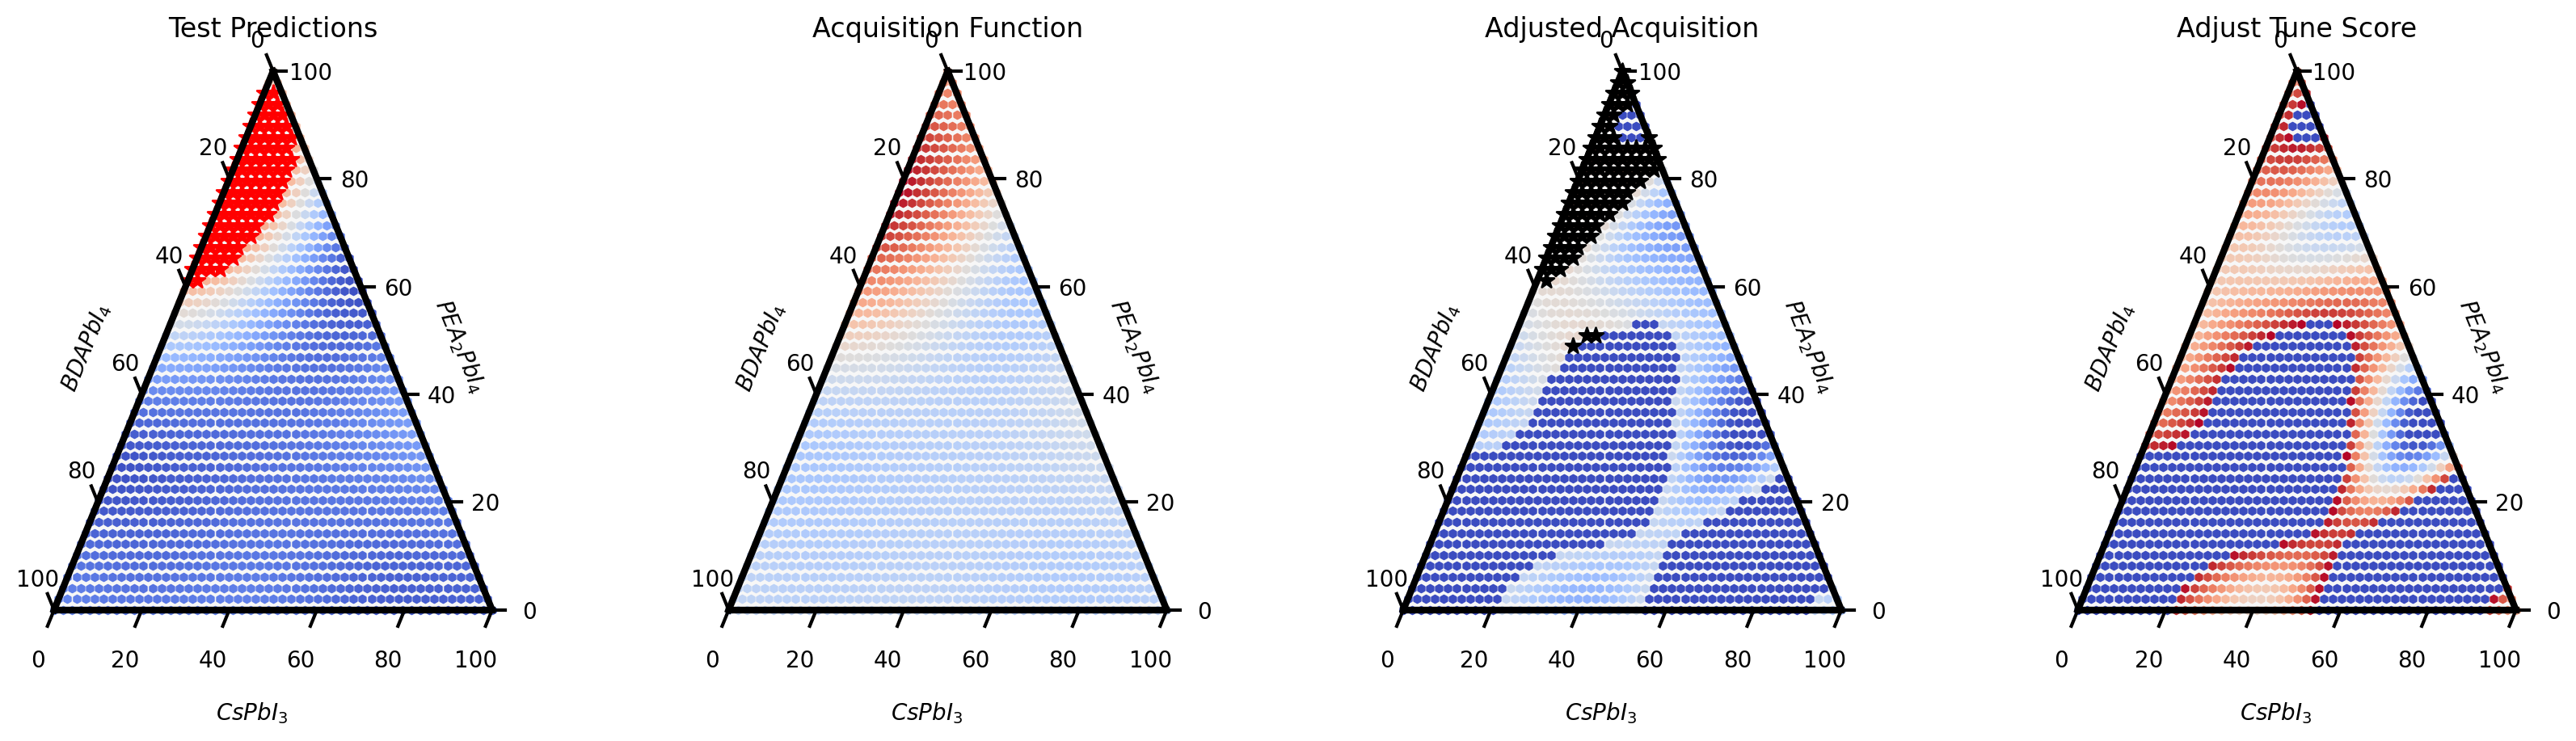

In [ ]:
scale = 1  # Ternary plot scale

# Setup figure
figure, ax = plt.subplots(figsize=(12, 6), dpi = 200)

# Define grid for subplots
grid = plt.GridSpec(1, 4, wspace=0.4, hspace=0.3)

# Create ternary subplots
tax1 = ternary.TernaryAxesSubplot(ax=plt.subplot(grid[0, 0]), scale=scale)
tax2 = ternary.TernaryAxesSubplot(ax=plt.subplot(grid[0, 1]), scale=scale)
tax3 = ternary.TernaryAxesSubplot(ax=plt.subplot(grid[0, 2]), scale=scale)
tax4 = ternary.TernaryAxesSubplot(ax=plt.subplot(grid[0, 3]), scale=scale)

# Assuming y_pred, acq, acq_tune, and init_tune_score are calculated for Xnew and normalized

# Test Predictions
pred_colors = plt.cm.coolwarm((y_pred-y_pred.min()) / (y_pred.max()-y_pred.min()))
for point, color in zip(Xnew, pred_colors):
    tax1.scatter([point], marker='h', color=color, s=10)
tax1.set_title("Test Predictions", fontsize=14, fontweight='bold')

# Acquisition Function
acq_colors = plt.cm.coolwarm(acq / np.max(acq))
for point, color in zip(Xnew, acq_colors):
    tax2.scatter([point], marker='h', color=color, s=10,colorbar=True)
tax2.set_title("Acquisition Function", fontsize=14, fontweight='bold')

# Adjusted Acquisition
acqtune_colors = plt.cm.coolwarm(acq_tune / np.max(acq_tune))
for point, color in zip(Xnew, acqtune_colors):
    tax3.scatter([point], marker='h', color=color, s=10)
tax3.set_title("Adjusted Acquisition", fontsize=14, fontweight='bold')

# Initial Tune Score
init_tune_score_colors = plt.cm.coolwarm(adjust_tune_score / np.max(adjust_tune_score))
for point, color in zip(Xnew, init_tune_score_colors):
    tax4.scatter([point], marker='h', color=color, s=10)
tax4.set_title("Adjust Tune Score", fontsize=14, fontweight='bold')

# Highlighting Next Sample Points
# Assuming X_next_batch is a subset of points in Xnew
for point in X_next_batch_int:  # Adjust this loop if X_next_batch is not in the correct format
    tax1.scatter([point], marker='*', color='red', s=50, label='Next Sample Point')

for point in X_next_batch_int_acq:  # Adjust this loop if X_next_batch is not in the correct format
    tax3.scatter([point], marker='*', color='black', s=50, label='Next Sample Point')


# Setting labels and limits for each ternary subplot
for tax in [tax1, tax2, tax3, tax4]:
    tax.boundary(linewidth=3.0)
    tax.bottom_axis_label(precursor1, offset=0.175)
    tax.right_axis_label(precursor2, offset=0.175)
    tax.left_axis_label(precursor3, offset=0.175)
    tax.set_axis_limits({'b': [0, 100], 'l': [0, 100], 'r': [0, 100]})
    # get and set the custom ticks:
    tax.get_ticks_from_axis_limits(multiple=0.20)
    tax.set_custom_ticks(fontsize=10, offset=0.03)

    tax.get_axes().axis('off')

plt.show()

In [ ]:

def unnormalize_data(values, original_min, original_max, step_size=0.5):
    """
    Unnormalize values to their original scale and round to the nearest step size.

    Parameters:
    values (np.array): Normalized values.
    original_min (float): Minimum of original scale before normalization.
    original_max (float): Maximum of original scale before normalization.
    step_size (float): The minimum increment size for rounding (default is 0.5).

    Returns:
    np.array: Unnormalized and rounded values.
    """
    # Scale values from the normalized 0-1 range to the original range
    scaled_values = values * (original_max - original_min) + original_min

    # Round values to the nearest increment of step_size
    rounded_values = np.round(scaled_values / step_size) * step_size

    return rounded_values


    # These should be the same values used during the original normalization
original_min = 0  # replace with your actual original minimum, if different
original_max = 50  # replace with your actual original maximum sum, if different

# Unnormalize the data using the original min and max
X_unnormalized = unnormalize_data(X_next_batch_int_acq,original_min, original_max)
X1 = X_unnormalized[:, 0]
X2 = X_unnormalized[:, 1]
X3 = 50 - (X1 + X2)

X_all_components = np.column_stack((X1, X2, X3))



In [ ]:
wells = [f"{chr(65+i)}{j+1}" for i in range(8) for j in range(12)]

In [ ]:
df = pd.DataFrame(X_all_components, columns=['CsPbI3', 'PEA2PbI4', 'BDAPbI4'])
df.insert(0, 'Well', wells)




##Dual GP instability score only for intensity


In [ ]:


def instability_score_simple(df, target_wavelength=705, wavelength_tolerance=10, degradation_weight=0.3, position_weight=0.7):
    """
    Calculate an instability score focusing on intensity change and peak position relative to a target wavelength.

    Parameters:
    - df: DataFrame with columns for initial and final peak positions and intensities.
    - target_wavelength: The target wavelength for peak analysis.
    - wavelength_tolerance: The tolerance range for the target wavelength.
    - degradation_weight: The weight of the intensity change in the total score.
    - position_weight: The weight of the peak position accuracy in the total score.

    Returns:
    - An array of instability scores, with lower scores indicating more stable and accurate peaks.
    """
    max_score = 1  # Maximum score for a single component
    stb_scores = []  # Container for the calculated instability scores

    for _, row in df.iterrows():
        # Extract peak positions and intensities
        peak_positions_int = row['initial_peak_positions']
        peak_positions_fin = row['final_peak_positions']
        peak_intensities_int = row['initial_peak_intensities']
        peak_intensities_fin = row['final_peak_intensities']

        # Calculate the intensity change component of the score
        intensity_change = np.abs(peak_intensities_fin - peak_intensities_int) / max(peak_intensities_int, 1e-10)
        intensity_score = min(intensity_change, max_score) * degradation_weight

        # Calculate the peak position component of the score
        position_deviation = min(abs(peak_positions_fin - target_wavelength), abs(peak_positions_int - target_wavelength))
        position_score = 0 if position_deviation <= wavelength_tolerance else (position_deviation / target_wavelength) * position_weight
        position_score = min(position_score, max_score)  # Ensure the score does not exceed max_score

        # Combine the components to calculate the total instability score
        total_score = intensity_score + position_score
        total_score = min(total_score, 1)  # Ensure the total score does not exceed 1

        stb_scores.append(total_score)

    return np.array(stb_scores)


In [ ]:
rng_key1, rng_key2 = gpax.utils.get_keys()
batch_size = 96
    # Initialize GP model with the specified kernel and priors
# Update the gp_model initialization accordingly
gp_model = gpax.viGP(input_dim=2, kernel='RBF',
                     kernel_prior=kernel_prior,  # if still supported
                     noise_prior_dist=noise_prior_dist)
gp_model.fit(rng_key1, X_int, y_train_normalized, jitter=1e-5)
  # Normalize train data

/usr/local/lib/python3.10/dist-packages/gpax/models/gp.py:117: UserWarning: `kernel_prior` will remain available for complex priors. However, for modifying only the lengthscales, it is recommended to use `lengthscale_prior_dist` instead. `lengthscale_prior_dist` accepts an instance of a numpyro.distributions Distribution object, e.g., `dist.Gamma(2, 5)`, rather than a function that calls `numpyro.sample`.
  warnings.warn(
100%|██████████| 1000/1000 [01:40<00:00,  9.94it/s, init loss: -151.0612, avg. loss [951-1000]: -244.4038]



Inferred GP parameters
k_length         0.2528
k_scale          0.0476
noise            0.023200000000000002


In [ ]:
# Use UCB for direct batch selection
acq = gpax.acquisition.UCB(rng_key2, gp_model, Xnew, maximize=True, beta=5, noiseless=False, jitter=1e-4)

# Initial GP predictions in batches
y_pred, y_sampled = gp_model.predict_in_batches(rng_key2, Xnew, noiseless=False, jitter=1e-4)

print("#######---Run a Tune---#######")
# Calculate stability score
y_tune_score = instability_score_simple(peak_data)
y_tune_score = (y_tune_score-np.min(y_tune_score))/(np.max(y_tune_score)-np.min(y_tune_score))

# Run GP to predict stability score of unmeasured points and adjust acquisition value
init_tune_score, adjust_tune_score = tune_GP(X_int, y_tune_score, Xnew)

# Adjust acquisition value based on the tuned score
acq_tune = acq.at[np.where(init_tune_score > np.quantile(init_tune_score, 0.8))].set(0)

# Adjust acquisition value based on the tuned score
acq_tune = acq*adjust_tune_score

#######---Run a Tune---#######


/usr/local/lib/python3.10/dist-packages/gpax/models/gp.py:117: UserWarning: `kernel_prior` will remain available for complex priors. However, for modifying only the lengthscales, it is recommended to use `lengthscale_prior_dist` instead. `lengthscale_prior_dist` accepts an instance of a numpyro.distributions Distribution object, e.g., `dist.Gamma(2, 5)`, rather than a function that calls `numpyro.sample`.
  warnings.warn(
100%|██████████| 1000/1000 [01:35<00:00, 10.46it/s, init loss: -101.2565, avg. loss [951-1000]: -161.5297]



Inferred GP parameters
k_length         0.129
k_scale          0.056400000000000006
noise            0.028800000000000003


In [ ]:
# Assuming batch_size is defined; select the top 'batch_size' points based on adjusted acquisition scores
batch_indices_int = np.argsort(acq)[-batch_size:]
batch_indices_int_acq = np.argsort(acq_tune)[-batch_size:]

# Select the next batch of experiments using these indices
X_next_batch_int = Xnew[batch_indices_int]
X_next_batch_int_acq_2 = Xnew[batch_indices_int_acq]
print("Indices of next batch: ", batch_indices_int)
print("Indices of next batch after tune: ", batch_indices_int_acq)
print("Next batch of experiments: ", X_next_batch_int_acq)

Indices of next batch:  [1088 1236 1066 1176 1108 1270 1226 1190 1252 1065 1215 1203 1144 1267
 1087 1269 1258 1263 1244 1126 1107 1160 1086 1266 1235 1175 1251 1262
 1143 1225 1085 1257 1189 1106 1265 1214 1202 1125 1243 1159 1261 1105
 1250 1256 1234 1142 1174 1124 1260 1104 1224 1188 1213 1201 1242 1255
 1158 1249 1123 1141 1233 1254 1173 1122 1223 1241 1248 1187 1157 1212
 1140 1200 1232 1247 1172 1240 1139 1156 1222 1186 1211 1199 1231 1239
 1171 1155 1221 1185 1230 1210 1198 1170 1220 1184 1209 1197]
Indices of next batch after tune:  [1187 1144 1251 1001 1159 1233 1090  999 1048 1127 1000 1173 1109 1025
 1199 1143 1211 1069 1186 1258 1242 1158 1274 1024 1022 1172 1047 1126
 1089 1222 1108 1023 1155 1170 1185 1139 1142 1171 1157 1198 1184 1264
 1122 1044 1068 1156 1046 1104 1232 1125 1210 1065 1250 1085 1141 1140
 1197 1045 1088 1107 1123 1067 1124 1066 1105 1106 1087 1086 1221 1209
 1241 1257 1272 1273 1220 1231 1263 1268 1249 1230 1271 1240 1269 1256
 1270 1267 1262 1239 1248 1

<ipython-input-29-a59c439898d5>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  tax1 = ternary.TernaryAxesSubplot(ax=plt.subplot(grid[0, 0]), scale=scale)
/usr/local/lib/python3.10/dist-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


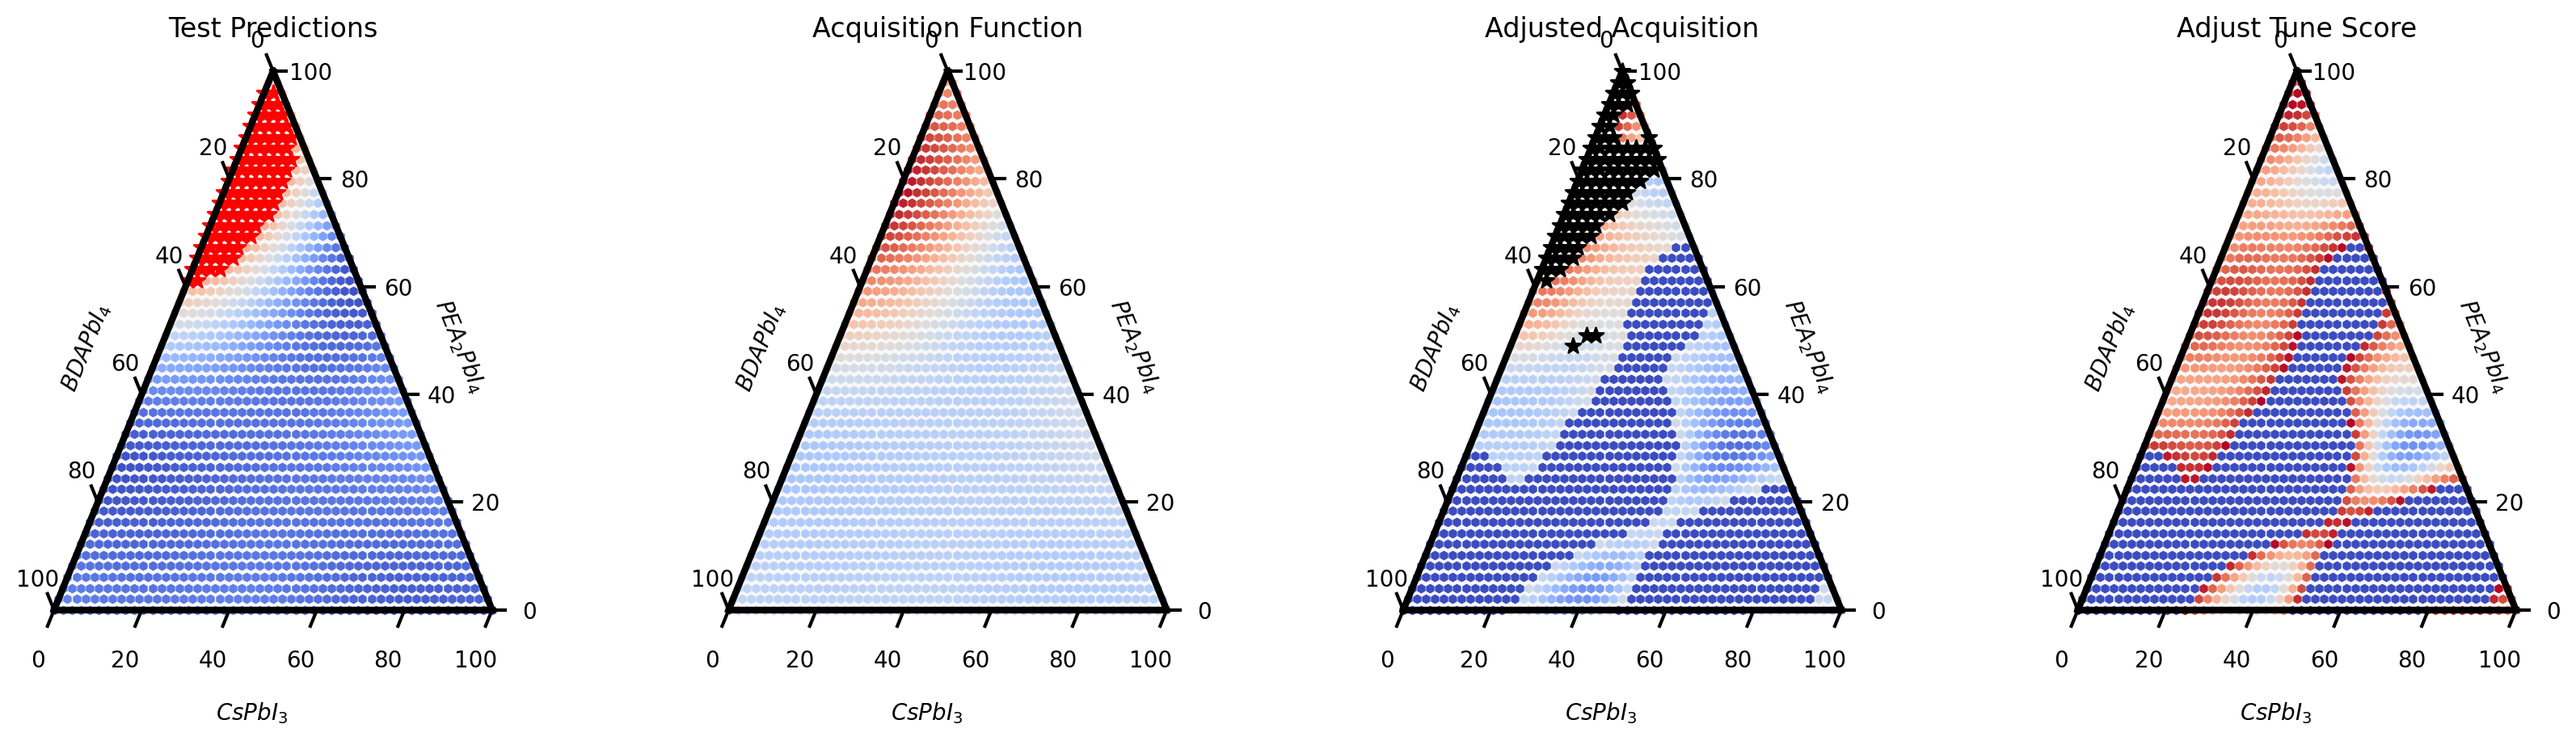

In [ ]:
scale = 1  # Ternary plot scale

# Setup figure
figure, ax = plt.subplots(figsize=(20, 5), dpi = 200)

# Define grid for subplots
grid = plt.GridSpec(1, 4, wspace=0.4, hspace=0.3)

# Create ternary subplots
tax1 = ternary.TernaryAxesSubplot(ax=plt.subplot(grid[0, 0]), scale=scale)
tax2 = ternary.TernaryAxesSubplot(ax=plt.subplot(grid[0, 1]), scale=scale)
tax3 = ternary.TernaryAxesSubplot(ax=plt.subplot(grid[0, 2]), scale=scale)
tax4 = ternary.TernaryAxesSubplot(ax=plt.subplot(grid[0, 3]), scale=scale)

# Assuming y_pred, acq, acq_tune, and init_tune_score are calculated for Xnew and normalized

# Test Predictions
pred_colors = plt.cm.coolwarm((y_pred-y_pred.min()) / (y_pred.max()-y_pred.min()))
for point, color in zip(Xnew, pred_colors):
    tax1.scatter([point], marker='h', color=color, s=10)
tax1.set_title("Test Predictions")

# Acquisition Function
acq_colors = plt.cm.coolwarm(acq / np.max(acq))
for point, color in zip(Xnew, acq_colors):
    tax2.scatter([point], marker='h', color=color, s=10,colorbar=True)
tax2.set_title("Acquisition Function")

# Adjusted Acquisition
acqtune_colors = plt.cm.coolwarm(acq_tune / np.max(acq_tune))
for point, color in zip(Xnew, acqtune_colors):
    tax3.scatter([point], marker='h', color=color, s=10)
tax3.set_title("Adjusted Acquisition")

# Initial Tune Score
init_tune_score_colors = plt.cm.coolwarm(adjust_tune_score / np.max(adjust_tune_score))
for point, color in zip(Xnew, init_tune_score_colors):
    tax4.scatter([point], marker='h', color=color, s=10)
tax4.set_title("Adjust Tune Score")

# Highlighting Next Sample Points
# Assuming X_next_batch is a subset of points in Xnew
for point in X_next_batch_int:  # Adjust this loop if X_next_batch is not in the correct format
    tax1.scatter([point], marker='*', color='red', s=50, label='Next Sample Point')

for point in X_next_batch_int_acq:  # Adjust this loop if X_next_batch is not in the correct format
    tax3.scatter([point], marker='*', color='black', s=50, label='Next Sample Point')


# Setting labels and limits for each ternary subplot
for tax in [tax1, tax2, tax3, tax4]:
    tax.boundary(linewidth=3.0)
    tax.bottom_axis_label(precursor1, offset=0.175)
    tax.right_axis_label(precursor2, offset=0.175)
    tax.left_axis_label(precursor3, offset=0.175)
    tax.set_axis_limits({'b': [0, 100], 'l': [0, 100], 'r': [0, 100]})
    # get and set the custom ticks:
    tax.get_ticks_from_axis_limits(multiple=0.20)
    tax.set_custom_ticks(fontsize=10, offset=0.03)

    tax.get_axes().axis('off')

plt.show()

In [ ]:

# Assuming adjust_tune_score is an array of scores you've used for coloring
# Normalize these scores as you did in your plot
normalized_scores = (adjust_tune_score - np.min(adjust_tune_score)) / (np.max(adjust_tune_score) - np.min(adjust_tune_score))

# Define threshold for red color, assuming higher values are red in the 'coolwarm' colormap
# This threshold value is arbitrary and should be adjusted based on your specific color mapping and requirement
red_threshold = 0.9  # Adjust this value according to your specific color scale and analysis

# Find indices where the normalized score is greater than the threshold
red_indices = np.where(normalized_scores > red_threshold)[0]

# Extract coordinates for these indices from Xnew
red_points = Xnew[red_indices]

# Print or process these coordinates
print("Coordinates corresponding to red points in 'Adjust Tune Score':")
print(red_points)


Coordinates corresponding to red points in 'Adjust Tune Score':
[[0.24489796 0.        ]
 [0.79591837 0.        ]
 [0.81632653 0.        ]
 [0.83673469 0.        ]
 [0.85714286 0.        ]
 [0.87755102 0.        ]
 [0.89795918 0.        ]
 [0.91836735 0.        ]
 [0.93877551 0.        ]
 [0.26530612 0.02040816]
 [0.48979592 0.02040816]
 [0.93877551 0.02040816]
 [0.95918367 0.02040816]
 [0.26530612 0.04081633]
 [0.48979592 0.04081633]
 [0.93877551 0.04081633]
 [0.95918367 0.04081633]
 [0.28571429 0.06122449]
 [0.30612245 0.08163265]
 [0.34693878 0.10204082]
 [0.3877551  0.12244898]
 [0.40816327 0.12244898]
 [0.51020408 0.12244898]
 [0.44897959 0.14285714]
 [0.46938776 0.14285714]
 [0.48979592 0.14285714]
 [0.51020408 0.14285714]
 [0.48979592 0.16326531]
 [0.51020408 0.16326531]
 [0.53061224 0.16326531]
 [0.51020408 0.18367347]
 [0.53061224 0.18367347]
 [0.55102041 0.18367347]
 [0.57142857 0.18367347]
 [0.51020408 0.20408163]
 [0.63265306 0.20408163]
 [0.69387755 0.2244898 ]
 [0.1224489

In [ ]:
X_unnormalized = unnormalize_data(red_points,original_min, original_max)
X1 = X_unnormalized[:, 0]
X2 = X_unnormalized[:, 1]
X3 = 50 - (X1 + X2)

X_all_components_2 = np.column_stack((X1, X2, X3))


In [ ]:
import numpy as np

# Assuming X_unnormalized contains unnormalized data [X1, X2] and the total sum should be 50
X1 = X_unnormalized[:, 0]
X2 = X_unnormalized[:, 1]
X3 = 50 - (X1 + X2)  # Calculate X3 based on the remaining value out of 50

# Convert to percentage of the total sum which is 50
X1_percent = (X1 / 50) * 100
X2_percent = (X2 / 50) * 100
X3_percent = (X3 / 50) * 100

# Stack the percentage values into a new array
X_all_components_percent = np.column_stack((X1_percent, X2_percent, X3_percent))

# Print or use the percentage values
print("Component percentages:")
print(X_all_components_percent)


Component percentages:
[[24.  0. 76.]
 [80.  0. 20.]
 [82.  0. 18.]
 [84.  0. 16.]
 [86.  0. 14.]
 [88.  0. 12.]
 [90.  0. 10.]
 [92.  0.  8.]
 [94.  0.  6.]
 [27.  2. 71.]
 [49.  2. 49.]
 [94.  2.  4.]
 [96.  2.  2.]
 [27.  4. 69.]
 [49.  4. 47.]
 [94.  4.  2.]
 [96.  4.  0.]
 [29.  6. 65.]
 [31.  8. 61.]
 [35. 10. 55.]
 [39. 12. 49.]
 [41. 12. 47.]
 [51. 12. 37.]
 [45. 14. 41.]
 [47. 14. 39.]
 [49. 14. 37.]
 [51. 14. 35.]
 [49. 16. 35.]
 [51. 16. 33.]
 [53. 16. 31.]
 [51. 18. 31.]
 [53. 18. 29.]
 [55. 18. 27.]
 [57. 18. 25.]
 [51. 20. 29.]
 [63. 20. 17.]
 [69. 22.  9.]
 [12. 24. 64.]
 [14. 24. 62.]
 [76. 24.  0.]
 [10. 27. 63.]
 [12. 27. 61.]
 [14. 27. 59.]
 [16. 27. 57.]
 [49. 27. 24.]
 [ 6. 29. 65.]
 [ 8. 29. 63.]
 [10. 29. 61.]
 [12. 29. 59.]
 [14. 29. 57.]
 [16. 29. 55.]
 [49. 29. 22.]
 [ 0. 31. 69.]
 [ 2. 31. 67.]
 [ 4. 31. 65.]
 [ 6. 31. 63.]
 [16. 31. 53.]
 [18. 31. 51.]
 [16. 33. 51.]
 [18. 33. 49.]
 [47. 33. 20.]
 [18. 35. 47.]
 [45. 35. 20.]
 [20. 37. 43.]
 [20. 39. 41.]
 [

In [ ]:
df = pd.DataFrame(X_all_components_percent , columns=['CsPbI3', 'PEA2PbI4', 'BDAPbI4'])



'/content/Suggested with high stability.csv'